In [2]:
from fashion_clip.fashion_clip import FashionCLIP
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image
import numpy as np
from IPython.display import Image, display
import os
import PIL

fclip = FashionCLIP('fashion-clip')

In [3]:
# Specify the directory path
folder_path = './images'

# Get all filenames in the folder
filenames = os.listdir(folder_path)[:100]

images = ["./images/" + str(k) for k in filenames]

# we create image embeddings and text embeddings
image_embeddings = fclip.encode_images(images, batch_size=32)

# we normalize the embeddings to unit norm (so that we can use dot product instead of cosine similarity to do comparisons)
image_embeddings = image_embeddings/np.linalg.norm(image_embeddings, ord=2, axis=-1, keepdims=True)

1it [00:00,  3.01it/s]


In [4]:
category_labels = ["Tops", "Bottoms", "Outerwear", "Dresses", "Underwear", "Activewear", "Sleepwear", "Accessories", "Footwear", "Glasses", "Jacket", "Socks"]
color_labels = ["Red", "Blue", "Yellow", "Green", "Orange", "Purple", "Black", "White", "Gray", "Brown", "Beige", "Pink"]
adjective_labels = ["stylish", "elegant", "comfortable", "trendy", "casual", "formal", "chic", "vintage", "modern", "sleek", "vibrant", "classic", "sporty", "luxurious", "fitted", "loose", "colorful", "monochrome", "bold", "subtle"]

category_labels_prompt = [f"A product picture of {k}" for k in category_labels]
color_labels_prompt = [f"A {k} piece of clothing" for k in color_labels]
adjective_labels_prompt = [f"A {k} piece of clothing" for k in adjective_labels]

category_label_embeddings = fclip.encode_text(category_labels_prompt, batch_size=32)
category_label_embeddings = category_label_embeddings/np.linalg.norm(category_label_embeddings, ord=2, axis=-1, keepdims=True)
category_predicted_classes_distribution = category_label_embeddings.dot(image_embeddings.T)

color_label_embeddings = fclip.encode_text(color_labels_prompt, batch_size=32)
color_label_embeddings = color_label_embeddings/np.linalg.norm(color_label_embeddings, ord=2, axis=-1, keepdims=True)
color_predicted_classes_distribution = color_label_embeddings.dot(image_embeddings.T)

adjective_label_embeddings = fclip.encode_text(adjective_labels_prompt, batch_size=32)
adjective_label_embeddings = adjective_label_embeddings/np.linalg.norm(adjective_label_embeddings, ord=2, axis=-1, keepdims=True)
adjective_predicted_classes_distribution = adjective_label_embeddings.dot(image_embeddings.T)

Map:   0%|          | 0/12 [00:00<?, ? examples/s]

1it [00:01,  1.77s/it]


Map:   0%|          | 0/12 [00:00<?, ? examples/s]

1it [00:00,  8.26it/s]


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

1it [00:00,  5.65it/s]


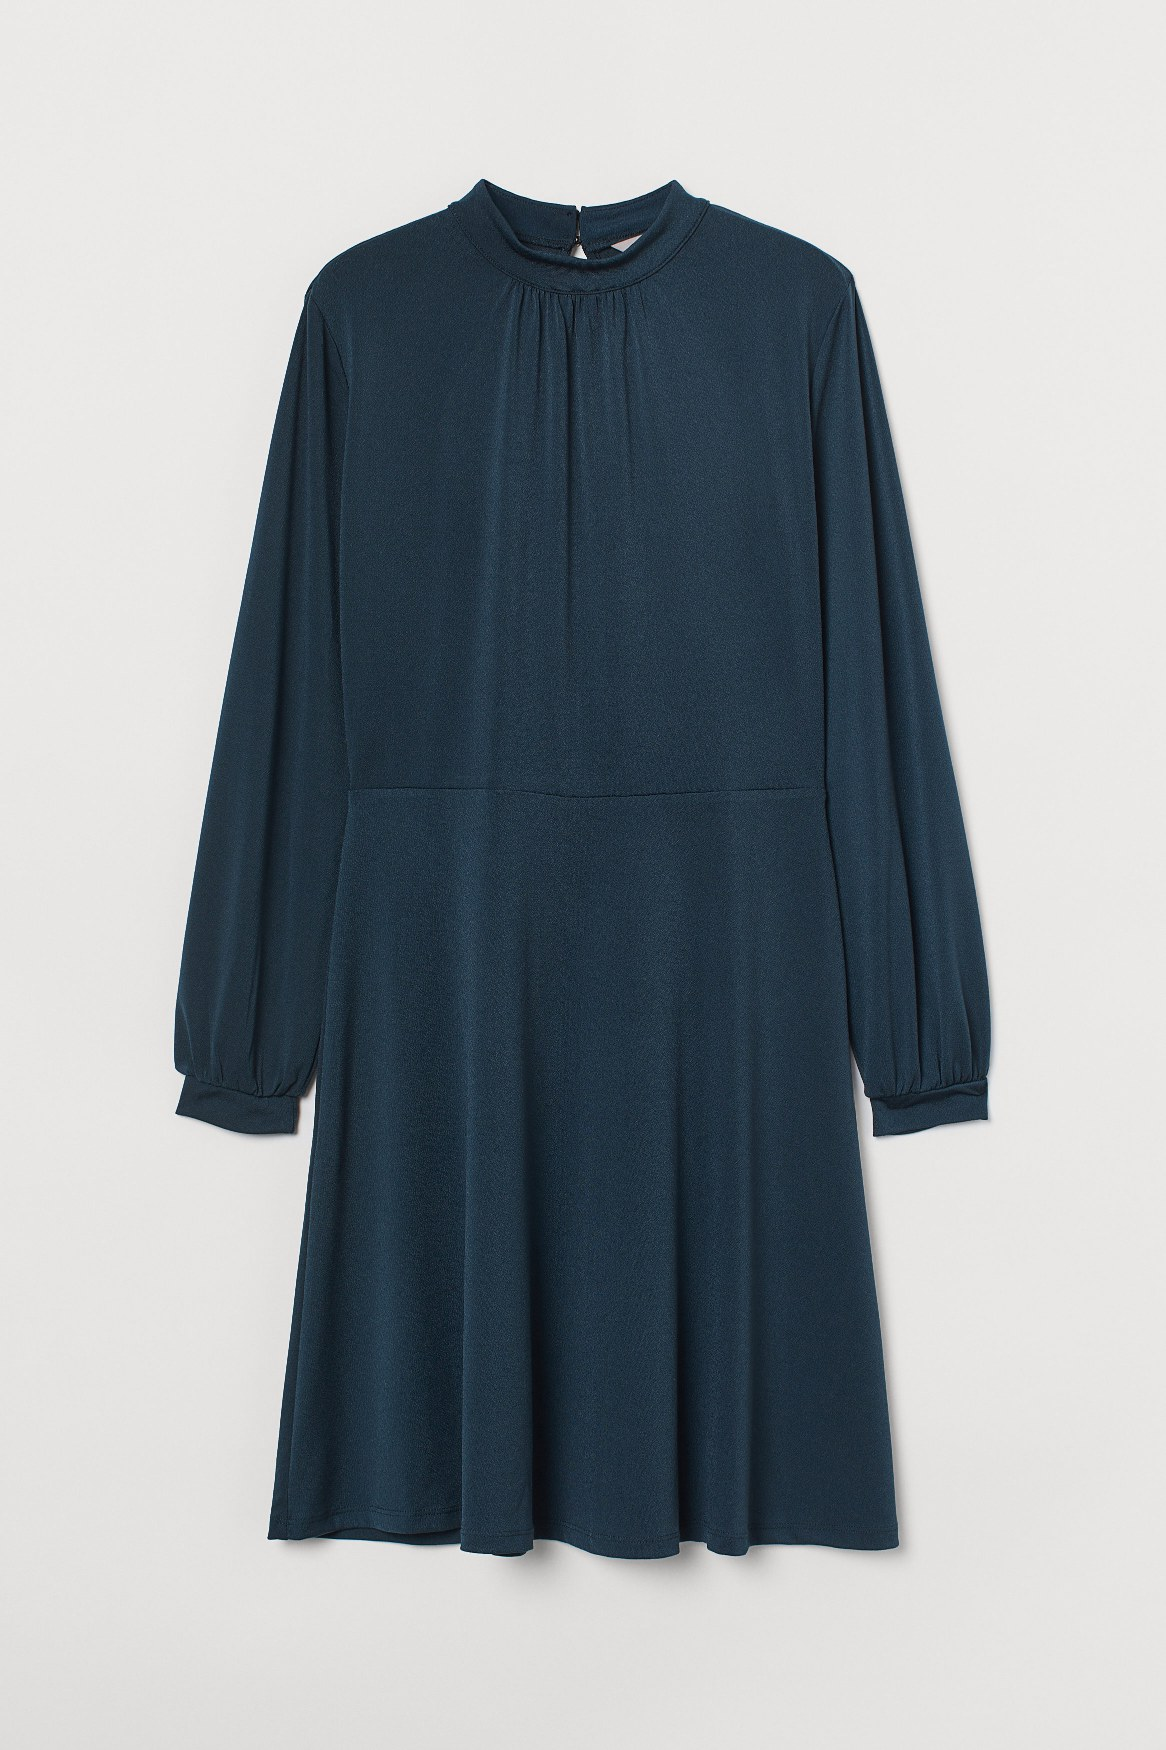

Category:
('Dresses', 0.30201316)
('Sleepwear', 0.26986477)
('Tops', 0.26874113)

Color:
('Blue', 0.25530544)
('Black', 0.2184758)
('Green', 0.21093327)

Description:
('sleek', 0.26883134)
('comfortable', 0.26615584)
('classic', 0.26599988)
('fitted', 0.2621624)
('modern', 0.25862923)
('casual', 0.25569746)
('stylish', 0.25534466)
('trendy', 0.25143772)


In [5]:
idx = 7

# Display an image from a file
display(Image(filename=images[idx],width=200,height=200))

weights = category_predicted_classes_distribution[:, idx]
indices = sorted(range(len(weights)), key=lambda i: weights[i], reverse=True)[:3]
print("Category:")
for i in indices:
    print(f"{category_labels[i], weights[i]}")

weights = color_predicted_classes_distribution[:, idx]
indices = sorted(range(len(weights)), key=lambda i: weights[i], reverse=True)[:3]
print("\nColor:")
for i in indices:
    print(f"{color_labels[i], weights[i]}")

weights = adjective_predicted_classes_distribution[:, idx]
indices = sorted(range(len(weights)), key=lambda i: weights[i], reverse=True)[:8]
print("\nDescription:")
for i in indices:
    print(f"{adjective_labels[i], weights[i]}")

1it [00:00, 36.75it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

1it [00:00, 40.48it/s]


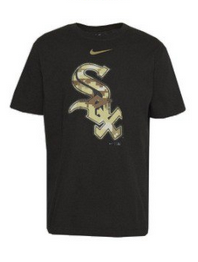

Category:
('sox', 0.2926406)
('sex', 0.25375527)


In [4]:
#Inference
image = "./images/sox.png"

# we create image embeddings and text embeddings
inf_image_embeddings = fclip.encode_images([image], batch_size=32)

# we normalize the embeddings to unit norm (so that we can use dot product instead of cosine similarity to do comparisons)
inf_image_embeddings = inf_image_embeddings/np.linalg.norm(inf_image_embeddings, ord=2, axis=-1, keepdims=True)

inf_labels = ["sox", "sex"]
prompts = [f"Shirt with the text {l}" for l in inf_labels]
inf_label_embeddings = fclip.encode_text(prompts, batch_size=32)
inf_label_embeddings = inf_label_embeddings/np.linalg.norm(inf_label_embeddings, ord=2, axis=-1, keepdims=True)
inf_predicted_classes_distribution = inf_label_embeddings.dot(inf_image_embeddings.T)

display(Image(filename=image,width=200,height=200))

weights = inf_predicted_classes_distribution[:, 0]
indices = sorted(range(len(weights)), key=lambda i: weights[i], reverse=True)[:3]
print("Category:")
for i in indices:
    print(f"{inf_labels[i], weights[i]}")

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

1it [00:01,  1.33s/it]

7


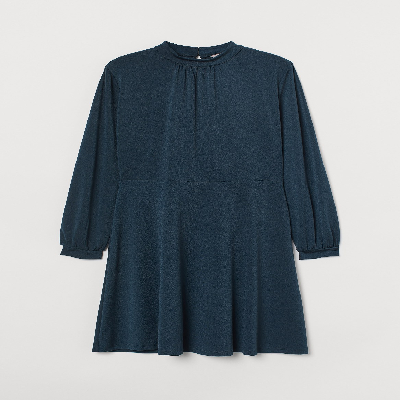

In [11]:
prompt = fclip.encode_text(["blue, collared shirt with long sleeves"], 32)[0]
id_of_matched_object = np.argsort(prompt.dot(image_embeddings.T))[-1]

found_object = filenames[id_of_matched_object]
print(id_of_matched_object)
image = PIL.Image.open(f"./images/{found_object}")
image = image.resize((400, 400), PIL.Image.NEAREST)
image